In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = r"D:\Megha\PPro\eKYC\data\imag1.jpg"
img = cv2.imread(img_path)
img

array([[[251,   5,   5],
        [251,   5,   5],
        [253,   5,   5],
        ...,
        [ 12, 253, 254],
        [  8, 252, 252],
        [  7, 251, 251]],

       [[251,   5,   5],
        [251,   5,   5],
        [253,   5,   5],
        ...,
        [ 13, 254, 255],
        [ 12, 253, 254],
        [  8, 252, 252]],

       [[251,   5,   5],
        [251,   5,   5],
        [253,   5,   5],
        ...,
        [ 14, 255, 255],
        [ 14, 255, 255],
        [ 11, 255, 255]],

       ...,

       [[ 14, 254,  11],
        [ 16, 255,  13],
        [ 16, 255,  13],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[ 16, 255,  13],
        [ 16, 255,  13],
        [ 14, 254,  11],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[ 15, 255,  12],
        [ 13, 253,  10],
        [  9, 249,   6],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]]

In [3]:
img.shape, img.size

((617, 941, 3), 1741791)

In [4]:
cv2.imshow("Image Display", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

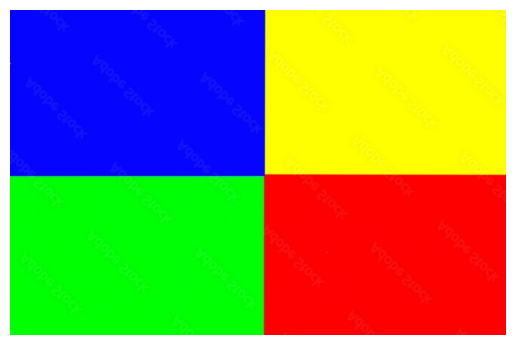

In [5]:
# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

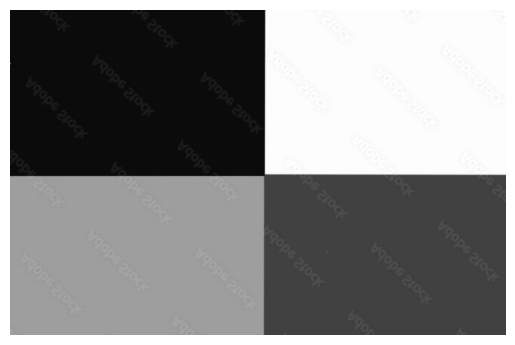

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')
plt.axis('off')
plt.show()

Converting an RGB image into a grayscale image involves a weighted sum of the RGB color channels. The typical formula for converting an RGB image to grayscale is:

Gray=0.2989×Red+0.5870×Green+0.1140×Blue

This formula represents the luminance of each pixel in the grayscale image, where the coefficients (0.2989, 0.5870, and 0.1140) represent the perceived brightness of each color channel to the human eye. These coefficients are based on the luminosity formula used in television systems.

So, for each pixel in the RGB image, you take the corresponding Red, Green, and Blue values, multiply them by their respective coefficients, and sum the results to obtain the grayscale intensity value for that pixel. This process is applied to every pixel in the image to generate the grayscale representation.

In [7]:
def rgb_to_gray(rgb_image):
    # Extract the dimensions of the input image
    height, width, _ = rgb_image.shape
    
    # Create a grayscale image with the same dimensions as the input image
    gray_image = np.zeros((height, width), dtype=np.uint8)
    
    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the RGB values for the current pixel
            red, green, blue = rgb_image[y, x]
            
            # Convert RGB to grayscale using the formula
            gray_value = int(0.2989 * red + 0.5870 * green + 0.1140 * blue)
            
            # Set the grayscale value for the current pixel in the output image
            gray_image[y, x] = gray_value
    
    return gray_image

# load the RGB image
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert RGB image to grayscale
gray_image = rgb_to_gray(rgb_image)

# Display the original RGB image and the grayscale image
cv2.imshow('RGB Image', rgb_image)
cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Splitting and Merging images

In [8]:
print(img.shape)
print("Top left", img[0,0])
print("Top right", img[0, 900])
print("Bottom Left", img[600, 0]) # Bottom left
print("Bottom right", img[600, 900]) # Bottom right

(617, 941, 3)
Top left [251   5   5]
Top right [  1 255 255]
Bottom Left [  4 251   3]
Bottom right [  0   0 254]


In [9]:
#Show individual color channels in the image
blue = img[:, :, 0] #Show only blue channel. (BGR so B=0)
green = img[:, :, 1] #Show only green channel
red = img[:, :, 2] #red only

cv2.imshow("blue pic", blue)
cv2.imshow("green pic", green)
cv2.imshow("red pic", red)
cv2.imshow("original image", img)
cv2.waitKey(0)          
cv2.destroyAllWindows()

In [10]:
#Or split all channels at once

b,g,r = cv2.split(img)

cv2.imshow("blue pic", b)
cv2.imshow("green pic", g)
cv2.imshow("red pic", r)
cv2.imshow("original image", img)
cv2.waitKey(0)          
cv2.destroyAllWindows()

In [11]:
#to merge each image into bgr

img_merged = cv2.merge((b,g,r))

cv2.imshow("merged pic", img_merged)
cv2.waitKey(0)          
cv2.destroyAllWindows() 

### Image Smoothing/ Blurring

In image processing, blurring is the process of making an image less sharp and reducing its detail. It does this by making color transitions between edges smooth instead of sudden, and by averaging out rapid pixel intensity changes.

It is mainly used to reduce down the noise of the image. There are four ways we can perform smoothing operations
- Mean Blur
- Median Blur
- Gaussian Blur
- Bilateral Filter

Mean Blur

It is the simplest case of smoothing operation. This operation takes the average of pixels
and replace the central pixel with this average.

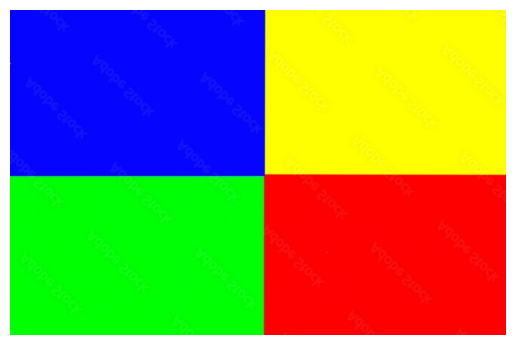

In [12]:
# img = cv2.imread("data\\01_raw_data\\sample_image1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

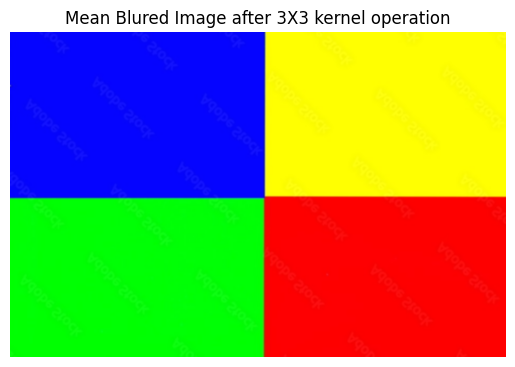

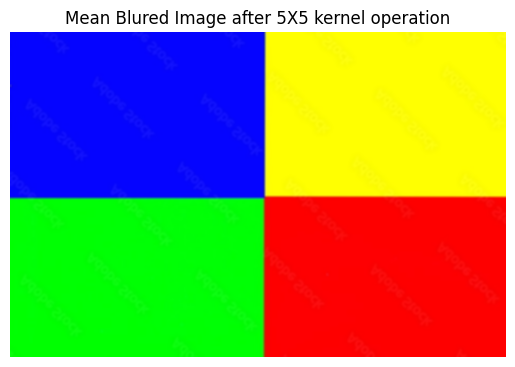

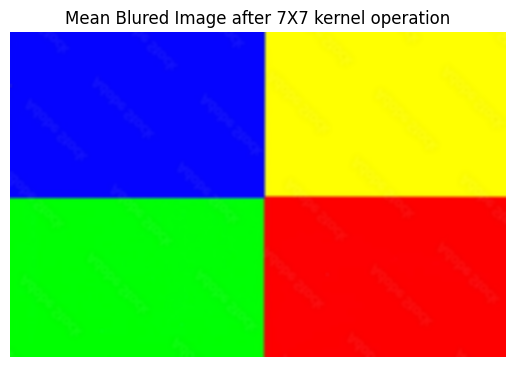

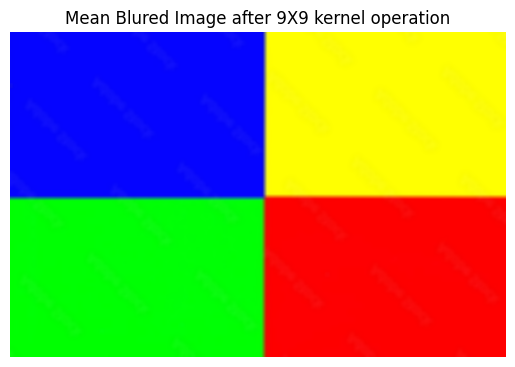

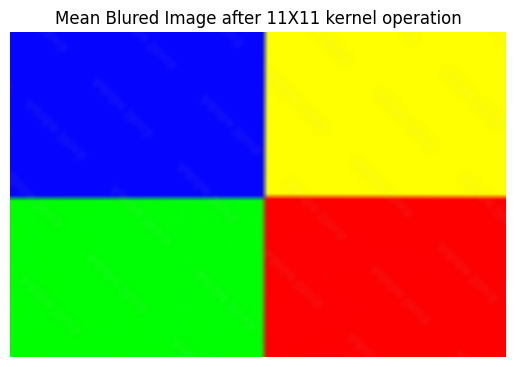

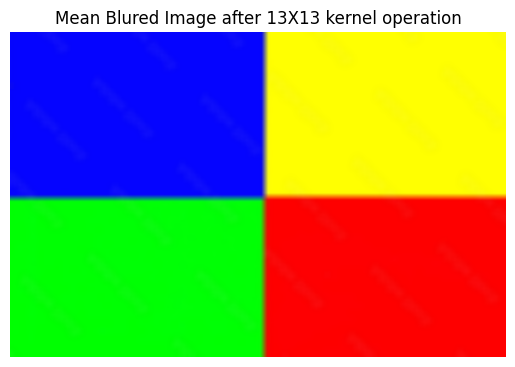

In [13]:
# creating mean filter kernel
def meankernel(size):
    mk = np.ones((size, size), dtype = np.float32)/(size**2)
    return mk
# performing mean blur
for size in range(3, 14, 2):
    blur_img = cv2.filter2D(img , -1, meankernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

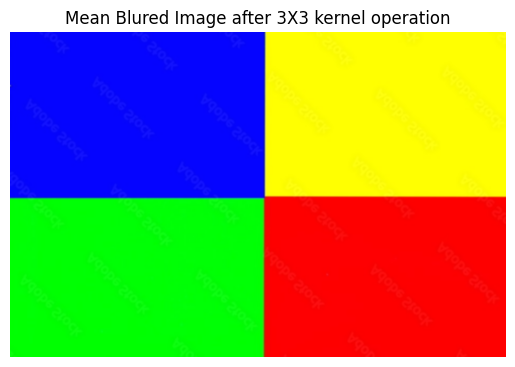

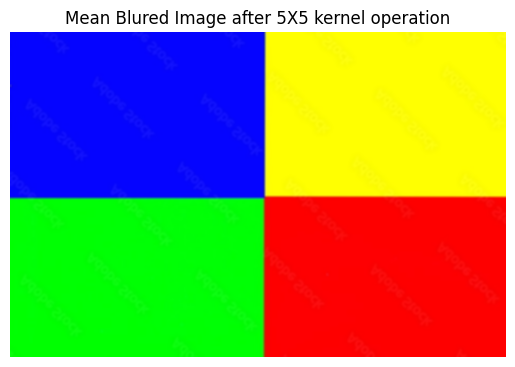

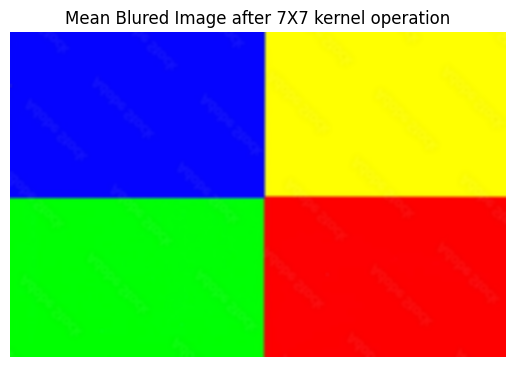

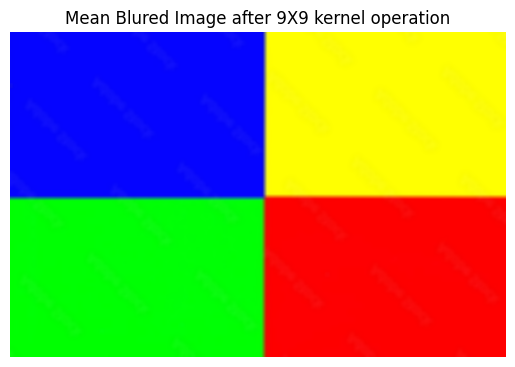

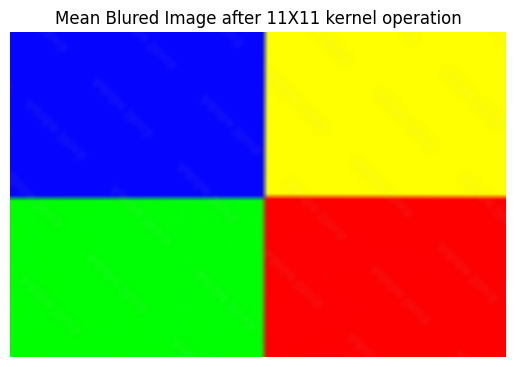

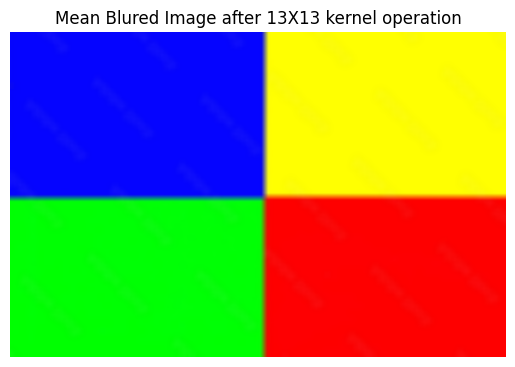

In [14]:
for size in range(3, 14, 2):
    blur_img = cv2.blur(img, (size, size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

Gaussian blur



In [15]:
import numpy as np
def gaussian_kernel(sigma):
    kernel_size = 3
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    normalization_factor = 1 / (2 * np.pi * sigma**2)
    # print(center)
    for i in range(kernel_size):
        for j in range(kernel_size):
            # x and y represent the distance of the current pixel from
            # the center of the kernel in the horizontal and vertical directions
            x = i - center
            y = j - center
            kernel[i, j] = normalization_factor*np.exp(-(x**2 + y**2) / (2 * sigma**2))
    # Normalize the kernel
    kernel /= np.sum(kernel)
    return kernel
    
# Example usage
sigma = 0.8
gaussian_kernel_3x3 = gaussian_kernel(sigma)
print("3x3 Gaussian Kernel:")
print(gaussian_kernel_3x3)

3x3 Gaussian Kernel:
[[0.05711826 0.12475775 0.05711826]
 [0.12475775 0.27249597 0.12475775]
 [0.05711826 0.12475775 0.05711826]]


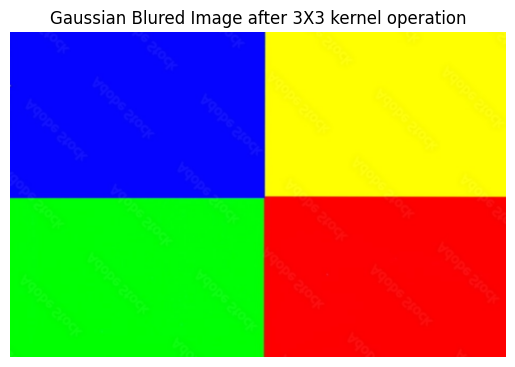

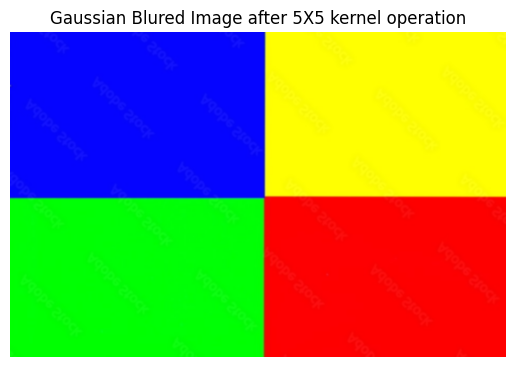

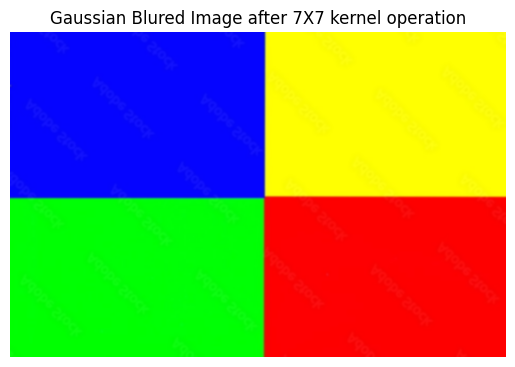

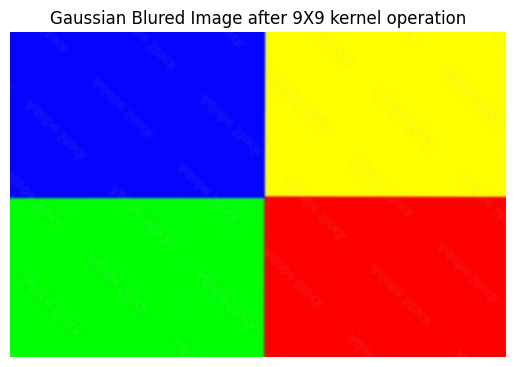

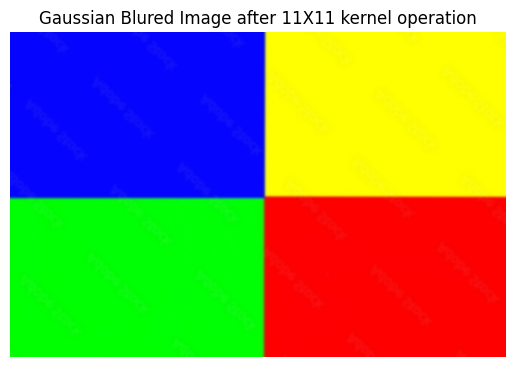

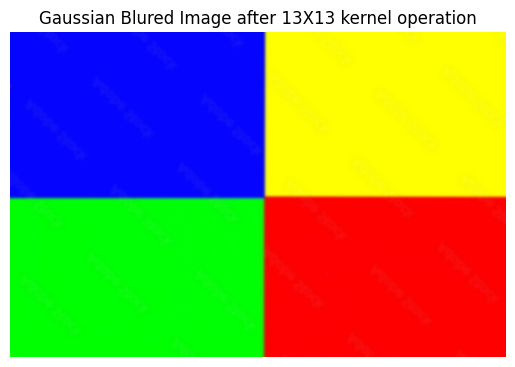

In [16]:
for size in range(3, 14, 2):
    blur_img = cv2.GaussianBlur(img, (size, size), 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Gaussian Blured Image after {size}X{size} kernel operation")
    plt.axis('off')
    plt.show()

### Histograms

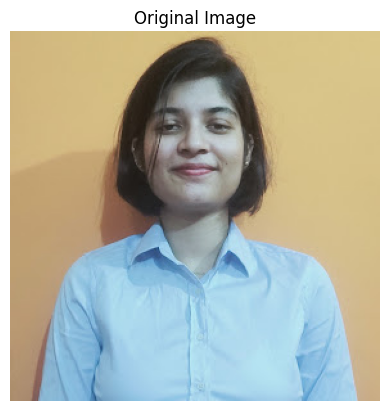

In [17]:
face_img = cv2.imread(r"D:\Megha\PPro\eKYC\data\megha.jpg")
img2 = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img2)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [18]:
img2.shape, img2.size

((288, 288, 3), 248832)

In [19]:
img2.ravel().shape

(248832,)

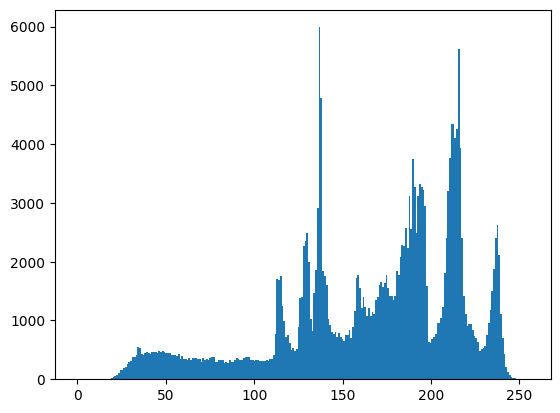

In [20]:
# Histograms
plt.hist(img2.ravel(), bins = 256, range=[0, 255])
plt.show()

In [21]:
colors = ('b', 'g', 'r')

img_ravel = [img[:, :, 0].ravel(), img[:, :, 1].ravel(), img[:,:, 2].ravel()]
type(img_ravel[0])

numpy.ndarray

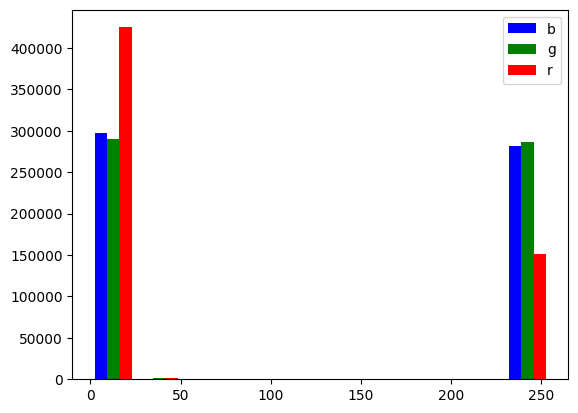

In [22]:
plt.hist(img_ravel, color=colors, label=colors)
plt.legend()
plt.show()

### Thresholding

Thresholding is a technique in image processing that segments an image into two regions: a foreground region and a background region. It uses pixel values to do this by replacing each pixel with a black pixel if the image intensity is less than a fixed value called the threshold, and with a white pixel if the pixel intensity is greater than the threshold. The threshold can be defined by the user or automatically, and any pixel value outside the range becomes 0, and any pixel value inside the range becomes 1, or a user-defined value. The result is a binary image

Simple Thresholding

Where we have to manually supply threshold value.
Applying simple thresholding methods requires human intervention. We must
specify a threshold value T. All pixel intensities below T are set to 255. And all pixel
intensities greater than T are set to 0.

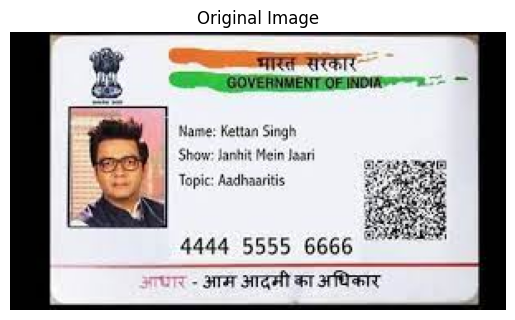

In [45]:
face_img = cv2.imread(r"D:\Megha\PPro\eKYC\data\adhar2.jpg")
img2 = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img2)
plt.title("Original Image")
plt.axis("off")
plt.show()

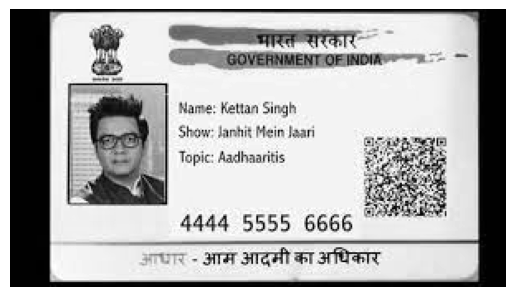

In [46]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [56]:
blurred=gray

In [57]:
# blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# plt.imshow(blurred, cmap='gray')
# plt.axis("off")
# plt.show()

After the image is blurred, we compute the thresholded image using cv2.threshold function. This method requires four arguments.

The first is the grayscale image that we wish to threshold. We supply our blurred image as the first.

Then, we manually supply our T threshold value. We use a value of T.

Our third argument is the output value applied during thresholding. Any pixel intensity p that is greater than T is set to zero and any p that is less than T is set to the output value

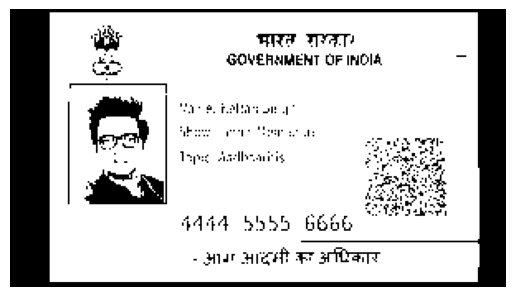

In [58]:
T, thresh = cv2.threshold(blurred, 85, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.axis("off")
plt.show()

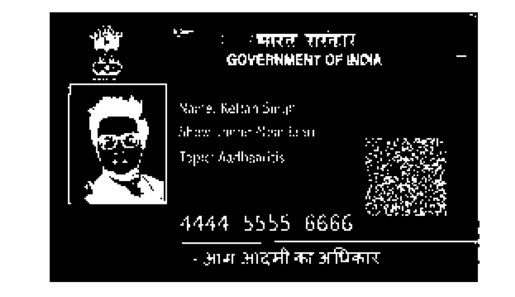

In [59]:
T, threshInv = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv, cmap='gray')
plt.axis("off")
plt.show()

Otsu Thresholding


In the previous section on simple thresholding we needed to manually supply a threshold value of T. For simple images in controlled lighting conditions, it might be feasible for us to hardcode this value.

But in real-world conditions where we do not have any a priori knowledge of the lighting conditions, we actually automatically compute an optimal value of T using Otsu’s method.

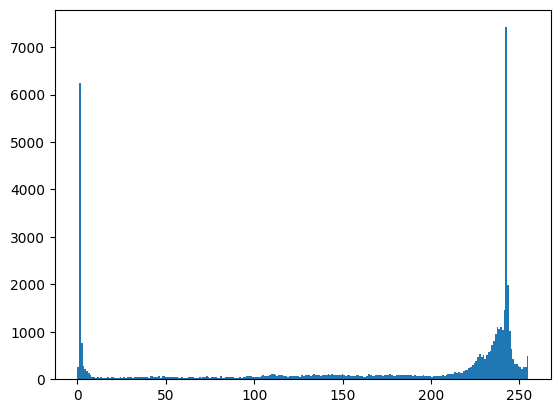

In [60]:
# Histograms
plt.hist(gray.ravel(), bins = 256, range=[0, 255])
plt.show()

Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal, which simply means that the histogram is two peaks.

Notice how the histogram clearly has two peaks — the first sharp peak corresponds to the uniform background color of the image, while the second peak corresponds to the card region itself

[INFO] otsu's thresholding value: 129.0


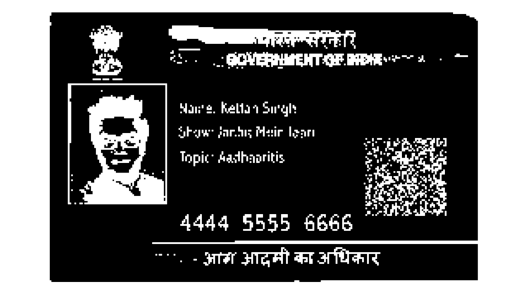

In [61]:
(T, otsu_threshInv) = cv2.threshold(blurred, 0, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print("[INFO] otsu's thresholding value: {}".format(T))
plt.imshow(otsu_threshInv, cmap='Greys_r')
plt.axis("off")
plt.show()

one of the downsides of using simple thresholding methods is that we need to manually
supply our threshold value, T. Furthermore, finding a good value of T may require many
manual experiments and parameter tunings, which is simply not practical in most
situations.

To aid us in automatically determining the value of T, we leveraged Otsu’s method. And
while Otsu’s method can save us a lot of time playing the “guess and checking” game, we
are left with only a single value of T to threshold the entire image.

For simple images with controlled lighting conditions, this usually isn’t a problem. But for
situations when the lighting is non-uniform across the image, having only a single value
of T can seriously hurt our thresholding performance.

Adaptive Thresholding

Goal in adaptive thresholding is to statistically examine local regions of our image and
determine an optimal value of T for each region — which begs the question: Which
statistic do we use to compute the threshold value T for each region?

It is common practice to use either the arithmetic mean or the Gaussian mean of
the pixel intensities in each region (other methods do exist, but the arithmetic mean and
the Gaussian mean are by far the most popular).

In the arithmetic mean, each pixel in the neighborhood contributes equally to computing
T. And in the Gaussian mean, pixel values farther away from the (x, y)-coordinate center
of the region contribute less to the overall calculation of T.

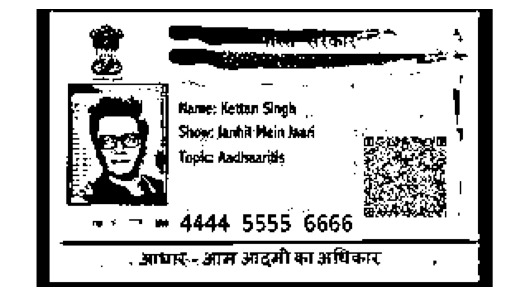

In [62]:
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)
# 2 is the tuning parameter

plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

The third argument is the adaptive thresholding method. Here we supply a value of cv2.ADAPTIVE_THRESH_MEAN_C to indicate that we are using the arithmetic mean of the local pixel neighborhood to compute our threshold value of T.

We could also supply a value of cv2.ADAPTIVE_THRESH_GAUSSIAN_C  to indicate we want to use the Gaussian average — which method t choose is entirely dependent on our application and situation

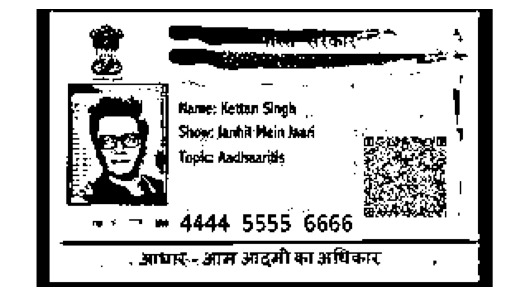

In [63]:
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

### Edge Detection

In [64]:
otsu_threshInv.shape

(168, 300)

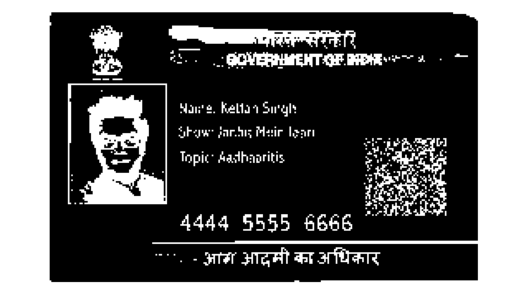

In [65]:
plt.imshow(otsu_threshInv, cmap = 'gray')
plt.axis('off')
plt.show()

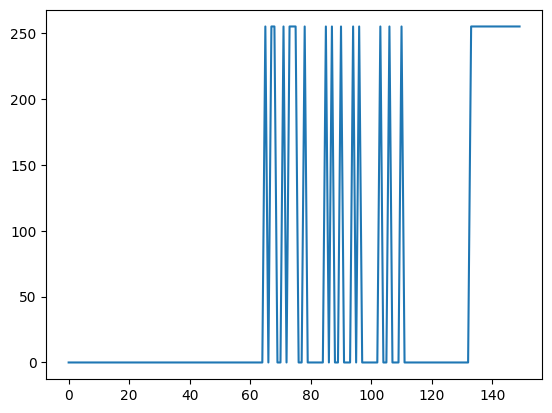

In [66]:
horiz_pixels = otsu_threshInv[100, 150:]
plt.plot(horiz_pixels)
plt.show()

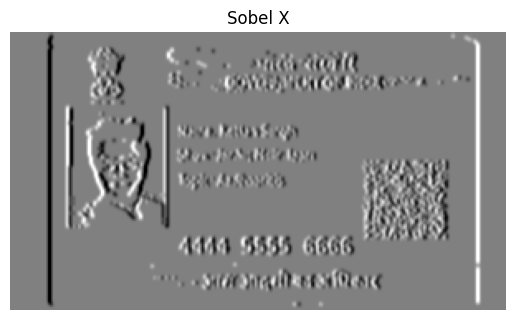

In [67]:
#  Sobel Edge Detection
sobelx = cv2.Sobel(src=otsu_threshInv, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=otsu_threshInv, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=otsu_threshInv, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
 
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)

 
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
 
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(sobelx, cmap = 'gray')
plt.axis('off')
plt.title('Sobel X')
plt.show()

In [68]:
# Canny Edge Detection
edges = cv2.Canny(image=blurred, threshold1=100, threshold2=200)
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Contour Detection

contours (24, 1, 260, 164)
Area 40887.5


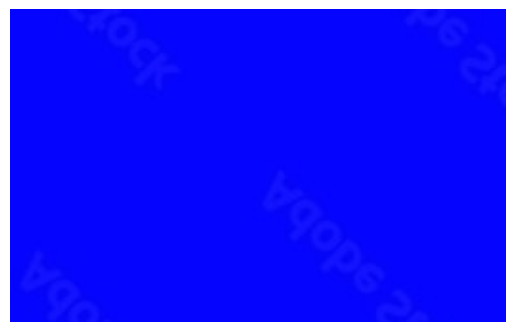

In [69]:

contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_image[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [70]:
contours_h, hr = cv2.findContours(adp_thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)

hr[0]

array([[366,  -1,   1,  -1],
       [  2,  -1,  -1,   0],
       [  3,   1,  -1,   0],
       ...,
       [ -1, 364,  -1, 359],
       [367,   0,  -1,  -1],
       [ -1, 366,  -1,  -1]], dtype=int32)